## Classification Layer 1: shapes and practical implementation of the major algorithms

In this notebook we will explore the three main classification algorithms used today - kernels, trees, and neural networks - building a fundamental intuition about each that we will build on throughout the course.   99% of all regression problems are solved using one or a combination of these algorithms.  In terms of machine learning, the goal here is to get you familiar with the shape of each regressor.  Practically speaking we want to get familiar with how to use the scikit-learn classification library - from searching documentation to common function syntax.  Together we will come to a number of important and far reaching conclusions about these fundamental machine learning algorithms.


------
This isn't a notebook you just read - you'll need to complete several coding portions of it (either individually or in groups) and think about the questions posed herein in order to build up your intuitive understanding of these algorithms, as well as your practical ability to use them via scikit-learn.  Whenever you see 'TODO' please do perform the requested task.

In other words, this is 'learning by discovery' notebook where you (either individually or in small groups) will start to build up your understanding of machine learning by doing real work and discussing it with your peers and instructors.  This is the best way to learn anything, far more effective than a book or lecture series.

## 1.  Getting started

In the investigation that follows we will use a two-dimensional toy dataset.  Real datasets - even high dimensional ones - look quite similar to this sort of dataset.  The value of using a simulated dataset at first is that we know the true underlying data-generating function we're trying to approximate (remember, this is what classification is all about).   So we can visually compare the result of classification algorithms together both in terms of how well they separate classes of data and - more importantly -  how well they represent the true underlying data-generating function itself. 

In the next few Python cells we import and plot some toy datasets, as well as the true underlying data separator for each.  In each case the left panel shows just the toy dataset, while the right panel shows our dataset along with the true underlying function (shown in dashed-black).

In [1]:
### in this cell we import necessary libraries for the demo
import numpy as np                  # a fundamental numerical linear algebra library
import matplotlib.pyplot as plt     # a basic plotting library
import pandas as pd                 # a basic data handling library
import sys
from sklearn.metrics import accuracy_score   # an accuracy scoring function from scikit learn
sys.path.append('utils')            # append our utility names

# this line is required in order to plot in a jupyter notebook itself
%matplotlib inline 

### 1.1 Importing datasets

First we import a dataset that is separable by a line.  Note: this doesn't mean that absolutely all of the points are correctly labeled.  You'll notice a few 'noisy' points (for classification problems noise often means mis-labeled) that are on the wrong side of the line.  This simulates real datasets, where an imperfect data collection process often leads to some points being mislabeled.

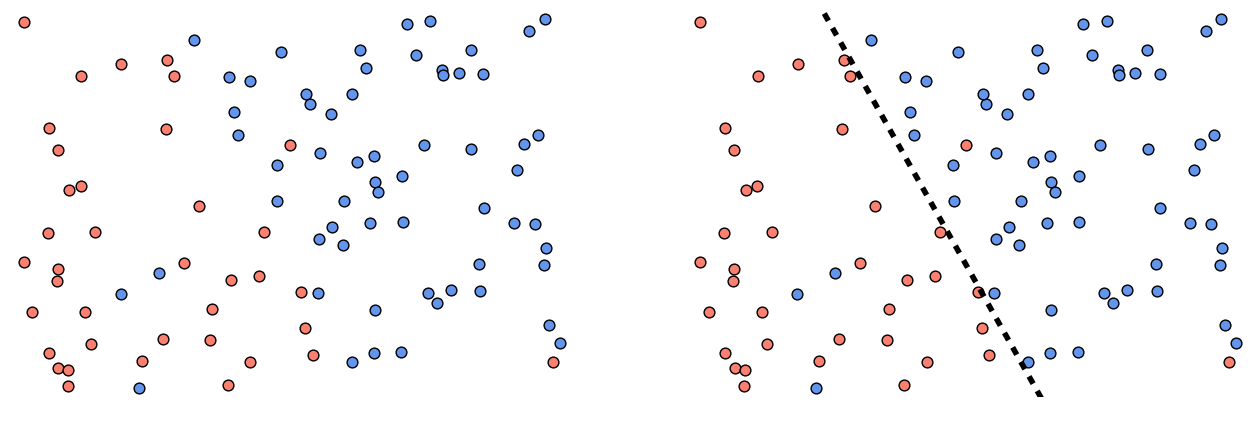

In [2]:
# load in the data and labels
data = np.asarray(pd.read_csv('datasets/classif_linear_data.csv'))
input_data_1 = data[:,:-1]
labels_1 = data[:,-1]

# load in the true polynomial separator
true_func_1 = np.asarray(pd.read_csv('datasets/classif_linear_func.csv'))

# plot the data and true underlying data-generating function
import classification_layer_1_utils as utils  # a set of simple plotting utilities for this notebook
utils.cust_plt_util(input_data_1,labels_1,true_func_1)

In [14]:
# TODO print out the dataset and labels, see what they look like numerically
# note: for those wanting to use the same color scheme - the following colors are used to color the points: 'cornflowerblue' and 'salmon' 



TODO: After printing out the data / labels in the above Python cell, answer the following questions.
    
1)  What values do the labels take?





2)  How many dimensions does a each datapoint in this dataset have?





3)  Is there another way to visualize this dataset other than the way shown here?  Try plotting the data / labels in this way in the next Python cell.





In [4]:
# TODO: visualie the dataset above in a different way than shown.  Don't worry about plotting the separator / true function, just the data itself.



TODO: 
    
After re-visualizing two classification datasets, can you complete the following statement?

Input data is to output data with regression

as

Input data is to ------- with classification.


In other words, what is the analog of (regression) output data in the case of classification?

Next we import a dataset that is separable by curve.  Again you'll notice a few 'noisy' points (for classification problems noise often means mis-labeled) that are on the wrong side of the curve.  This simulates real datasets, where an imperfect data collection process often leads to some points being mislabeled.

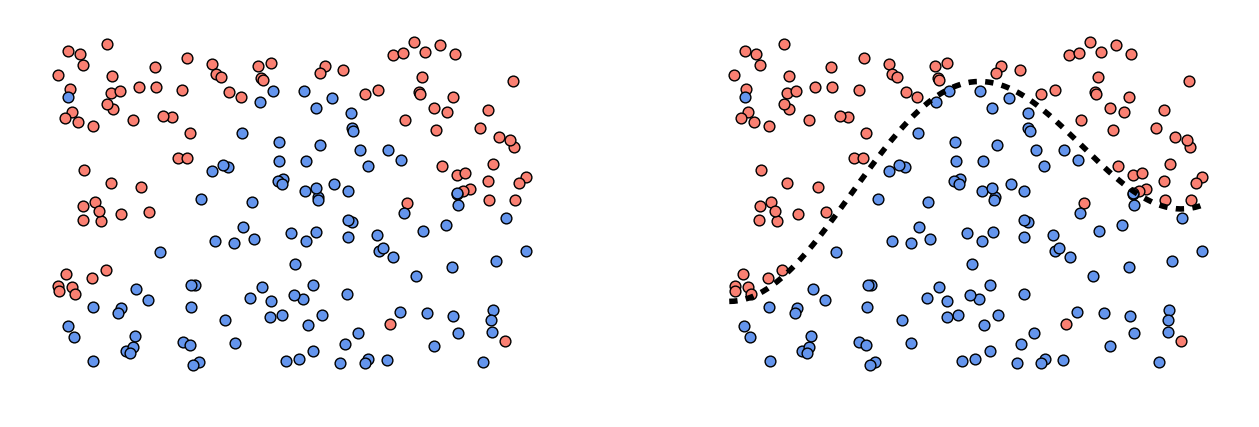

In [3]:
# load in the data and labels
data = np.asarray(pd.read_csv('datasets/classif_nonlinear_data.csv'))
input_data_2 = data[:,:-1]
labels_2 = data[:,-1]

# load in the true polynomial separator
true_func_2 = np.asarray(pd.read_csv('datasets/classif_nonlinear_func.csv'))

# plot the data and true underlying data-generating function
import classification_layer_1_utils as utils  # a set of simple plotting utilities for this notebook
utils.cust_plt_util(input_data_2,labels_2,true_func_2)

In [6]:
# TODO print out the dataset and labels, see what they look like numerically



TODO: After printing out the data / labels in the above Python cell, answer the following questions.
    
1)  What values do the labels take?





2)  How many dimensions does a each datapoint in this dataset have?





3)  Is there another way to visualize this dataset other than the way shown here?  Try plotting the data /labels in this way in the next Python cell.





In [15]:
# TODO: visualie the dataset above in a different way than shown.  Don't worry about plotting the separator / true function, just the data itself.
# note: for those wanting to use the same color scheme - the following colors are used to color the points: 'cornflowerblue' and 'salmon' 



## 2.  Toying aound with linear classification

Lets get rolling with our first classifier - logistic regression.  This is one popular alglrithm for linear classification - that is for learning a classifier to a dataset with a linear boundary.  As we will see - this performs quite well when a dataset is (generally) linearly seperable.  Otherwise it does not do so well.

In the next Python cell we apply this algorithm - from scikit learn's library of functions - to the first toy dataset.

Our classifier mislabeled 9 of 99 points


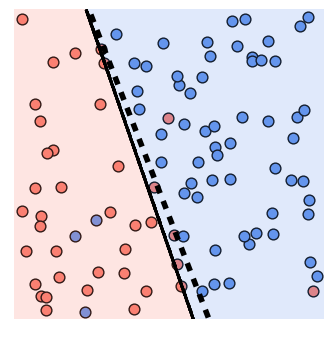

In [4]:
# create the linear logistic regression classifier and plug it into the previous Python function
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# fit our chosen classifier to the dataset
classifier.fit(input_data_1, labels_1)                              

# plot pts (in red and blue), true separator (in dashed black), and approximation (in solid-black)
utils.plot_approx(classifier,input_data_2,labels_2,true_func_2)

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_2)
acc = len(labels_2) - accuracy_score(labels_2.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_2)) + ' points'

Pretty good!  The learned classifier (in solid black) matches the true underlying separator (in dashed black) pretty well.

Note the coloring here: every point on one side of the learned classifier colored light red is considered a member of the red class by the learned classifier, and likewise with every point colored light blue.

### Note scikit-learn syntax

Note the scikit-learn syntax here - because you'll see it repeated for virtually every predictor in the scikit-learn library.

You always begin with an import statement like

*from scikit import PREDICTOR_NAME*

Then you create an instance of this object as

*classifier = PREDICTOR_NAME()*

You then fit this classifier to the dataset by saying

*classifier.fit(data,labels,algorithm_parameters)*

Then to make predictions for any set of input points using the learned classifier you type

*classifier.predict(some_data_input)*

### Applying logistic regression to our nonlinearly separable dataset

Now lets try the same thing we just tried on toy dataset number 1 to the second one - training a logistic regression classifier.

Our classifier mislabeled 49 of 200 points


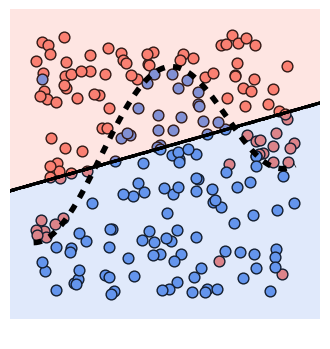

In [6]:
# create the linear logistic regression classifier and plug it into the previous Python function
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# fit our chosen classifier to the dataset
classifier.fit(input_data_2, labels_2)                              

# plot pts (in red and blue), true separator (in dashed black), and approximation (in solid-black)
utils.plot_approx(classifier,input_data_2,labels_2,true_func_2)

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_2)
acc = len(labels_2) - accuracy_score(labels_2.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_2)) + ' points'

Oof!  Not so good.  This is because logistic regression can only supply us with the best linear separator of this dataset - but it is truly separated by something nonlinear!  

## 3.  Toying around with the fundamental nonlinear algorithms

Its time to go nonlinear.  Here we play around with exemplars of the three fundamental nonlinear algorithms in machine learning **kernels**, **trees**, and **neural networks**.  99% of all nonlinear classification problems are solved using one or a combination of these algorithms. 

### Kernel-based classifiers

In the next Python cell we start off by fitting a kernel-based classifier to the dataset.  We only need a few lines to get things going here - and as mentioned earlier - they look very similar to those that allowed us to use scikit-learn's logistic regression functionality.

Play around with the value of the single parameter 'gamma' and rerun the cell several times to get a sesnse of how this affects the shape of the fitted classifier and the valid values it can take.  

TODO: Tinker around and find a value for 'gamma' that gives the best result - that is the closest fit to the underlying function.

Note some machine learning jargon you will hear a ton:

- **underfitting**: this is when your choice of parameter leads to a model that is too stiff - that is not nonlinear enough - to explain your dataset well.

- **overfitting**: this is when your choice of paramter leads to a model that is too nonlinear - that wiggles around way too much - to explain your dataset wel.

Our classifier mislabeled 21 of 200 points


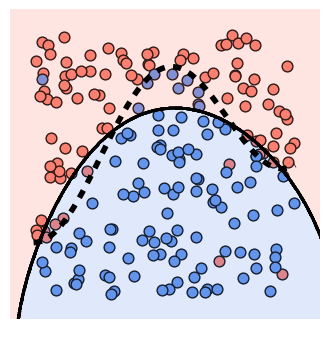

In [11]:
# SVC is a kernel classifier function from the scikit-learn library
from sklearn.svm import SVC

# create an instance of a kernel-based regressor from scikit learn
classifier = SVC(kernel = 'rbf',gamma = 1)

# fit our chosen classifier to the dataset
classifier.fit(input_data_2, labels_2)                              

# plot pts (in red and blue), true separator (in dashed black), and approximation (in solid-black)
utils.plot_approx(classifier,input_data_2,labels_2,true_func_2)

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_2)
acc = len(labels_2) - accuracy_score(labels_2.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_2)) + ' points'

### Tree-based classifiers

Now, lets look at our next algorithm: a tree-based classifier.
    
The next Pyton cell will mirror the one above completely - except we will now use a tree-based algorithm instead of the kernel-based algorithm used previously.  

#### **TODO**: 

There's one practical difference now though: you are going to use Google to find a tree-based algorithm, and peruse its documentation and/or examples to learn about its function name and parameters.  

As described previously - all of the classification functions in scikit-learn classification algorithms share the same syntax for declaration, fitting, and predicting.  This means all you need to do is


(1).  Google around for a tree-based classification algorithm built into scikit-learn.  Some good search terms for this are things like "trees + classification + scikit-learn" or "decision trees + classification + scikit-learn" or "random forests + classification + scikit-learn" or "boosting + classification + scikit-learn".  Each of these searches will return a documentation page for a tree-based classification algorithm built into scikit-learn.


(2).  Find its import statement.  In the previous example this was
    
    from sklearn.svm import SVC


(3).  Determine the algorithm's parameters, and define one or two when you create an instance of the algorithm.  In the previous example this was
    
    classifier = SVC(kernel = 'rbf', gamma = 10)
  
 Here the parameters were kernel and gamma.

You'll only need to adjust the first two lines of Python code in the above cell to try out a new tree-based algorithm from scikit-learn.

Once you have your tree-based algorithm, mirror what we did in the previous Python cell with our kernel-based classification: play around with the value of its parameter and rerun the cell to see how it affects the classification separation on our dataset.  If your algorithm has more than one adjustable paramter pick one parameter only, and one that takes in a numerical value.  After playing around with your parameter try to find a value for it that gives the best result - that is the closest fit to the underlying function.

In [ ]:
# TODO: Import a tree based classification algorithm from scikit-learn and declare an instance of it, make sure to include a paramter to tune


# fit your classifier to the data
classifier.fit(input_data_2, labels_2)                              

# plot pts (in red and blue), true separator (in dashed black), and approximation (in solid-black)
utils.plot_approx(classifier,input_data_2,labels_2,true_func_2)

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_2)
acc = len(labels_2) - accuracy_score(labels_2.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_2)) + ' points'

### Neural network based classifiers

Finally, lets perform the previous exercise for our final main classification algorithm: neural networks.  

#### TODO:

Find the neural network (classification) documentation page in scikit-learn and, in the next Python cell, mimic what we have done previously with kernel and tree classifiers.

Try changing the single parameter called 'hidden_layer_sizes' - this takes on integer values 1,2,3,...  Just make sure you are set: solver = 'lbgfs'.  After playing around with your parameter try to find a value for it that gives the best result - that is the closest fit to the underlying function.

Our classifier mislabeled 21 of 200 points


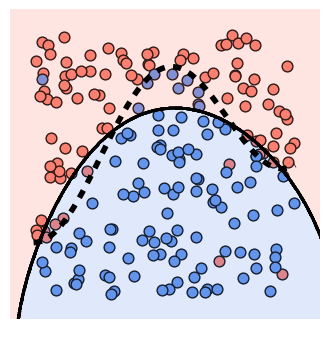

In [12]:
# TODO: Import a neural network based classification algorithm from scikit-learn and declare an instance of it, make sure to include a paramter to tune


# fit your classifier to the data
classifier.fit(input_data_2, labels_2)                              

# plot pts (in red and blue), true separator (in dashed black), and approximation (in solid-black)
utils.plot_approx(classifier,input_data_2,labels_2,true_func_2)

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_2)
acc = len(labels_2) - accuracy_score(labels_2.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_2)) + ' points'

### TODO: Conclusions
We have seen examples of the three main algorithms used for regression: kernels, trees, and neural networks.  Time to make some conclusions.  You should discuss these points and questions with your group, feel free to add any other conclusions you and your team has as well.

(1)   Google / stack overflow is your best friend - if you want to learn how to use a given machine learning library, all you need to do is Google around and find its documentation.


(2)  The terminal (or command-line) is also your new best friend - if you can't install a machine learning library or function, you can't use it, and most libraries do not have a nice visual user interface to install it.  You need to install it from the terminal.  This involves learning just a handful of commands based on your OS.  For example - as we saw the neural network package from scikit-learn is (as of late 2016 at least) available only in the development version of scikit, and upgrading to this version requires a command line install.  How do you learn some basic terminal commands for your OS?  See (1).



(3)  Kernels, trees, and neural networks provide very different shaped fits.  When do you think one will perform better than the others in practice?  Draw out some example datasets on either pencil and paper and - if you can - try testing out your hypothesis by making a toy dataset and testing your hypothesis. 


(4) Parameter tuning.  Parameters needed to be tuned in order to provide the best fit for each algorithm type.  This was reasonably easy to do for our simple dataset, and with a single parameter.  What do we do if we have higher dimensional data - where we can't visualize the data / fit?  What if we don't just have a single parameter to tune, but 100 parameters, or 1000 parameters - how can we tune these all properly?


(5) Parameter tuning.  Pick one of your algorithms.  Is the parameter setting that gives the best fit to the undrelying data-generating function the same as the parameter value giving the best fit to the data?  How different are these settings?


(6) What other sort of percularities did you note - if any - about each of the three algorithms?  For example, when you ran a given algorithm with a fixed parameter value several times - did you always get the same result?

### TODO - BONUS: Where do you think the learned boundary comes from?

Recall the exercises you performed after loading in each dataset - where you discovered the dimensionality of the points in these datasets, and then plotted the same classification data in a different way than shown in the pictures here.

With this in mind - what exactly are we creating when we learn a  classifier to the dataset?  Where does the separator we learn come from?

You can discover where the separator comes from by examining the plotting function **utils.plot_approx**, which you can find in the **classification_layer_1_utils.py** file in the utilties directory.

Try tinkering around with some of the code in this function.  Open the utilities file, mess around, re-save it, re-start the kernel of this notebook, and run the code again.  

What exactly are we creating to produce the learned separator - as viewed in the alternative view of the data you discovered in the first questions of this notebook?  Is there some other way to visualize whats being learned to the data when we learn a classifier?

From this perspective, what does the problem of classification remind you of?

### Epilogue

Does this notebook look similar to the one on regression?  Huh.  That's interesting, I wonder why that is...